**Name** : Poonam Raosaheb Wagh

**Roll No** : B1951020

**PRN** : 72018648L

**Class** : BE IT A

# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Loading and preparing the data

In [8]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [9]:
print(X_train.shape)

(60000, 28, 28)


In [10]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [11]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

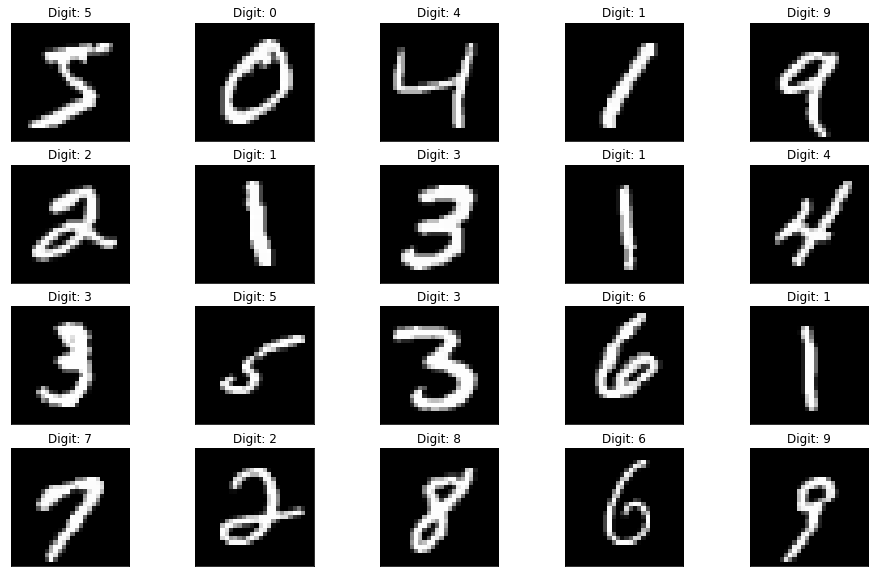

In [12]:
def plot_digit(image, digit, plt, i):
 plt.subplot(4, 5, i + 1)
 plt.imshow(image, cmap=plt.get_cmap('gray'))
 plt.title(f"Digit: {digit}")
 plt.xticks([])
 plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
 plot_digit(X_train[i], y_train[i], plt, i) 
plt.show()

In [13]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

# Creating the Model

In [14]:
model = Sequential([
 Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(100, activation="relu"),
 Dense(10, activation="softmax")
])


In [15]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
 optimizer=optimizer, 
 loss="sparse_categorical_crossentropy", 
 metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

# Train the Model

In [35]:
history = model.fit(X_train, y_train,validation_data = (x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.6328e-04 - accuracy: 1.0000 - val_loss: 23.2731 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 2.4964e-04 - accuracy: 1.0000 - val_loss: 23.2049 - val_accuracy: 0.9805
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 2.1729e-04 - accuracy: 1.0000 - val_loss: 23.0110 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 2.0789e-04 - accuracy: 1.0000 - val_loss: 22.9585 - val_accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 1.9068e-04 - accuracy: 1.0000 - val_loss: 23.5215 - val_accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 1.7933e-04 - accuracy: 1.0000 - val_loss: 23.8986 - val_accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 1.6882e-04 - acc

1/1 [==============================] - 0s 47ms/step


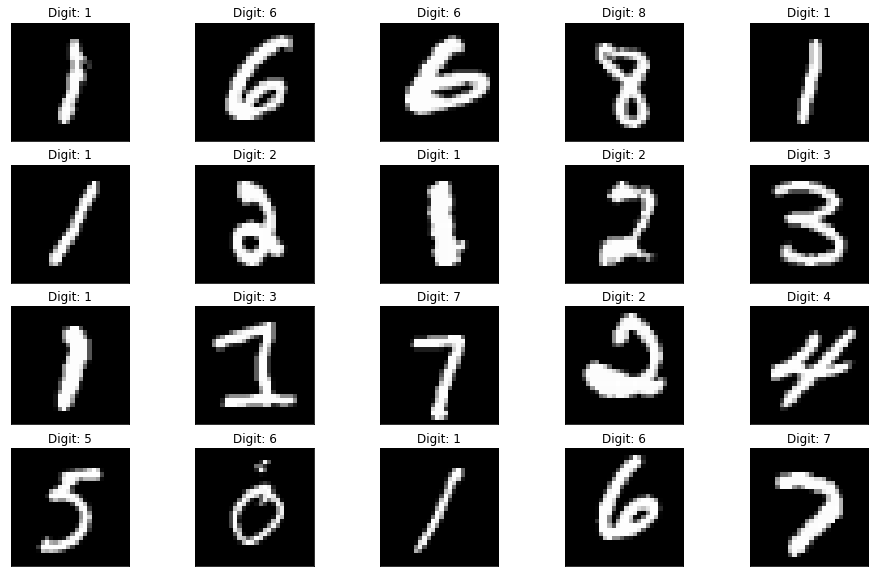

In [36]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
 plot_digit(image, digit, plt, i)
plt.show()

In [37]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 2s 8ms/step


0.9879

# Estimating the model's performance

In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])    #Test Loss
print('Test accuracy:', score[1])    #Test Accuracy

Test loss: 0.04982423037290573
Test accuracy: 0.9879000186920166


In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

<Figure size 432x288 with 0 Axes>

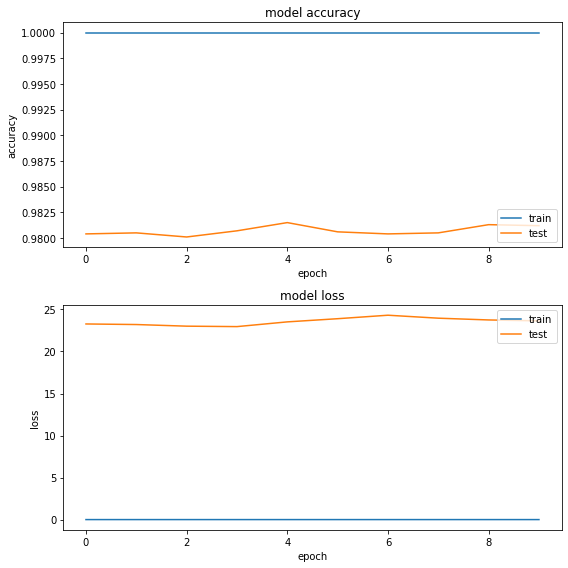

In [50]:
import os
# plotting the metrics
fig = plt.figure()
plt.figure(figsize=(8, 8))

plt.subplot(2,1,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


plt.subplot(2,1,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [51]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
 json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
